In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import torch
from torch import distributions
import matplotlib.pyplot as plt

from bbb.utils.pytorch_setup import DEVICE
from bbb.config.parameters import PriorParameters

In [15]:
prior_params = PriorParameters(
    w_sigma=1.,
    b_sigma=1.,
    w_sigma_2=0.2,
    b_sigma_2=0.2,
    w_mixture_weight=0.5,
    b_mixture_weight=0.5,
)

In [56]:
w_mix = distributions.Categorical(torch.tensor((prior_params.w_mixture_weight, 1-prior_params.w_mixture_weight), device=DEVICE))
b_mix = distributions.Categorical(torch.tensor((prior_params.b_mixture_weight, 1-prior_params.b_mixture_weight), device=DEVICE))

# Specify the individual components - whilst these appear to be multivariate Gaussians they will be seperated
w_norm_comps = distributions.Normal(torch.zeros(2, device=DEVICE), torch.tensor((prior_params.w_sigma, prior_params.w_sigma_2), device=DEVICE, dtype=torch.float32))
b_norm_comps = distributions.Normal(torch.zeros(2, device=DEVICE), torch.tensor((prior_params.b_sigma, prior_params.b_sigma_2), device=DEVICE, dtype=torch.float32))

# Easier version to play around with
# w_norm_comps = distributions.Normal(torch.tensor([-1.,1.], device=DEVICE), torch.tensor((prior_params.w_sigma, prior_params.w_sigma_2), device=DEVICE, dtype=torch.float32))
# b_norm_comps = distributions.Normal(torch.tensor([0.,0.], device=DEVICE), torch.tensor((prior_params.b_sigma, prior_params.b_sigma_2), device=DEVICE, dtype=torch.float32))

# Create the GMMs
w_prior = distributions.MixtureSameFamily(w_mix, w_norm_comps)
b_prior = distributions.MixtureSameFamily(b_mix, b_norm_comps)

In [57]:
w_prior_samples =w_prior.sample(sample_shape=(100000,))

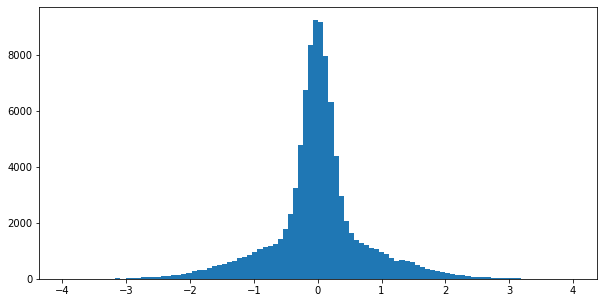

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(w_prior_samples.cpu().numpy(), bins=100)
pass

In [59]:
w_prior.cdf(torch.tensor([-4], device=DEVICE)), w_prior.cdf(torch.tensor([2], device=DEVICE))

(tensor([1.5840e-05], device='cuda:1'), tensor([0.9886], device='cuda:1'))